# Machine Learning Pipeline with Python

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load and visualize the Wine Quality dataset
# The Wine Quality dataset is available from the UCI repository.
# We'll load the dataset using pandas.

source = "wine_quality.csv"
wine_data = pd.read_csv(source, delimiter=';')

# Show the first few rows of the dataset
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


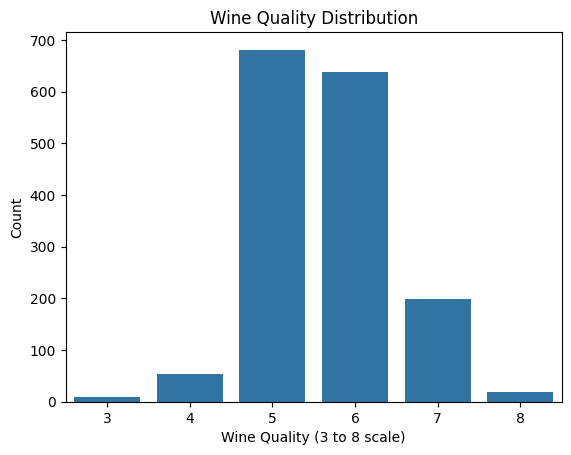

In [3]:
# Visualize the distribution of wine quality ratings
sns.countplot(x='quality', data=wine_data)
plt.title('Wine Quality Distribution')
plt.xlabel('Wine Quality (3 to 8 scale)')
plt.ylabel('Count')
plt.show()

# The dataset contains wine samples rated for quality from 3 to 8.
# We can observe the distribution of quality ratings.

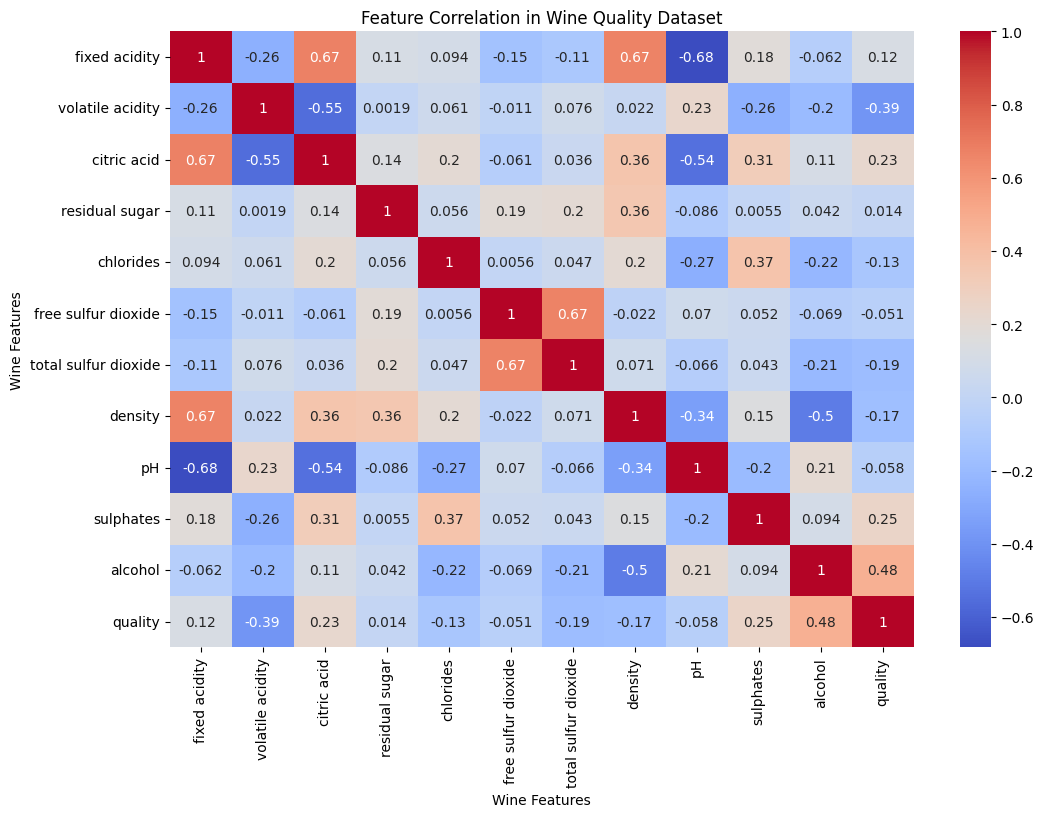

In [4]:
# Exploratory Data Analysis (EDA)
# Visualize relationships between features using a heatmap to show feature correlations.
plt.figure(figsize=(12, 8))
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation in Wine Quality Dataset')
plt.xlabel('Wine Features')
plt.ylabel('Wine Features')
plt.show()

# The heatmap highlights correlations between features, helping us understand which features are most related to the wine quality.


Training data shape: (1279, 11)
Test data shape: (320, 11)


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


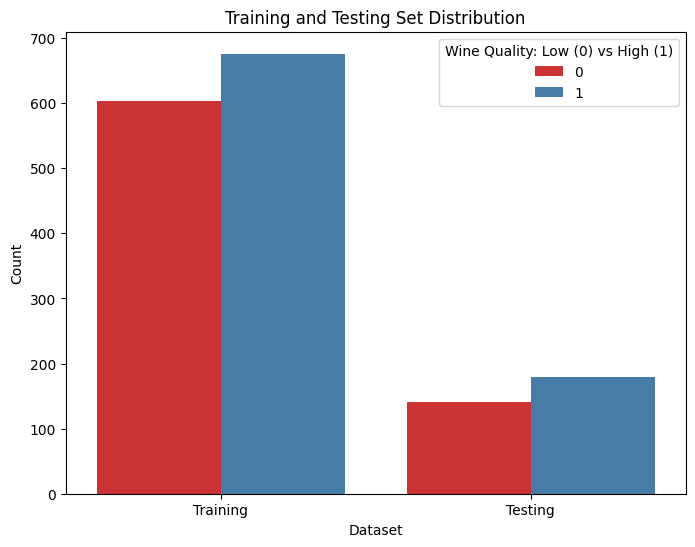

In [5]:
# Data Preprocessing with Training/Test Set Visualization
# For simplicity, we'll treat wine quality ratings <= 5 as "low quality" (0) and > 5 as "high quality" (1).

# Create a binary target variable 'quality_binary'
wine_data['quality_binary'] = (wine_data['quality'] > 5).astype(int)

# Drop the original 'quality' column, as we only need 'quality_binary' for classification.
wine_data = wine_data.drop(columns=['quality'])

# Define features (X) and target (y)
X = wine_data.drop(columns=['quality_binary'])
y = wine_data['quality_binary']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and test data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Visualize the distribution of training and test sets
# First, create a DataFrame that includes the train/test set labels for visualization purposes
train_test_df = pd.DataFrame({
    'Set': ['Training'] * len(y_train) + ['Testing'] * len(y_test),
    'Target': pd.concat([y_train, y_test])
})

# Visualize the count of training and test samples
plt.figure(figsize=(8, 6))
sns.countplot(x='Set', hue='Target', data=train_test_df, palette='Set1')
plt.title('Training and Testing Set Distribution')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.legend(title='Wine Quality: Low (0) vs High (1)')
plt.show()

# This visualization shows how the data is split between training and testing sets,
# and also provides insight into the class distribution in both sets.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

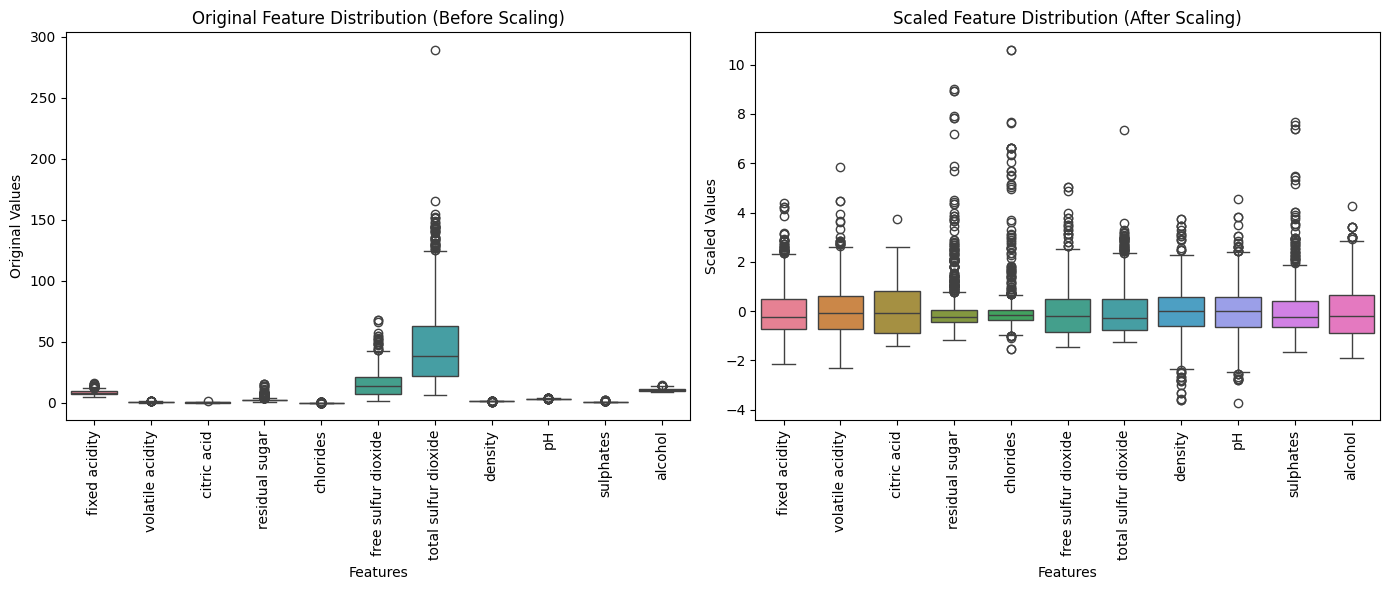

In [6]:
# Feature Scaling with Before/After Comparison and Feature Names as X-Axis Labels
# Some models (like KNN) are sensitive to the scale of the data, so we'll scale the feature values.
# We'll use StandardScaler to standardize features (mean 0, variance 1).

# Visualize the original feature distribution before scaling
plt.figure(figsize=(14, 6))

# Original data boxplot (before scaling)
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('Original Feature Distribution (Before Scaling)')
plt.xlabel('Features')
plt.ylabel('Original Values')

# Set the feature names as x-axis labels
plt.xticks(ticks=np.arange(len(X_train.columns)), labels=X_train.columns, rotation=90)

# Perform standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualize the scaled feature distribution after scaling
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('Scaled Feature Distribution (After Scaling)')
plt.xlabel('Features')
plt.ylabel('Scaled Values')

# Set the feature names as x-axis labels
plt.xticks(ticks=np.arange(len(X_train.columns)), labels=X_train.columns, rotation=90)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Explanation:
# - The left boxplot shows the original values of the features before scaling, with the feature names labeled on the x-axis.
# - The right boxplot shows the scaled features, where all features have been standardized to have mean 0 and variance 1, with the same x-axis labels.


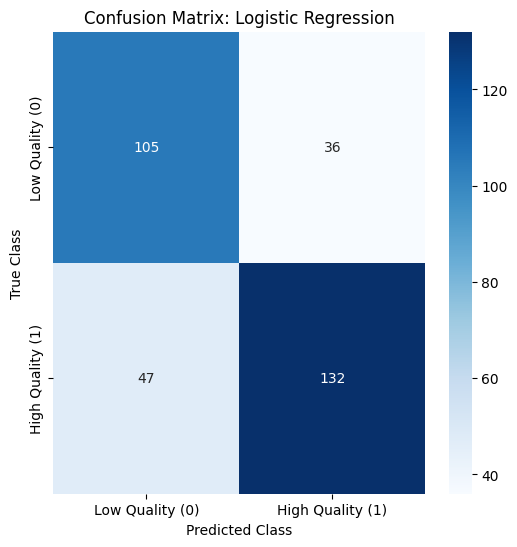

In [7]:
# Logistic Regression with GridSearchCV
# Logistic Regression is a linear model that predicts the probability of a binary outcome.
# We'll use GridSearchCV to tune the regularization parameter 'C'.

log_reg_params = {'C': [0.01, 0.1, 1, 10, 100]}
log_reg = GridSearchCV(LogisticRegression(random_state=42), log_reg_params, cv=5)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Visualize predictions with a confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks([0.5, 1.5], ['Low Quality (0)', 'High Quality (1)'])
plt.yticks([0.5, 1.5], ['Low Quality (0)', 'High Quality (1)'])
plt.show()

# Logistic Regression is a fast and interpretable linear classifier.


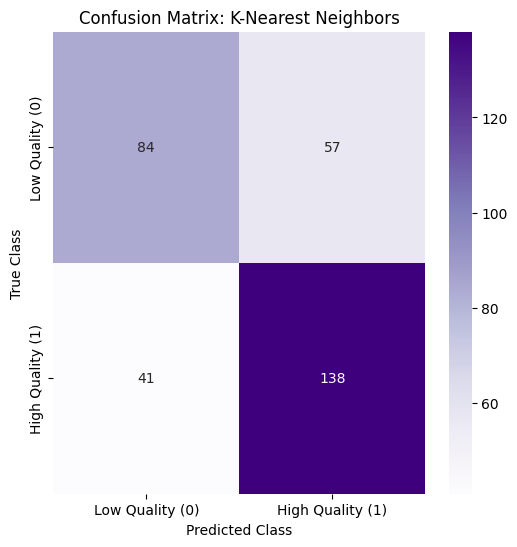

In [8]:
# K-Nearest Neighbors (KNN) Classifier
# KNN is a distance-based algorithm that classifies a point based on the majority class of its 'k' nearest neighbors.

knn_params = {'n_neighbors': [3, 5, 7, 9]}  # We'll tune the number of neighbors.
knn_clf = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_clf.fit(X_train_scaled, y_train)
y_pred_knn = knn_clf.predict(X_test_scaled)

# Visualize predictions with a confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix: K-Nearest Neighbors')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks([0.5, 1.5], ['Low Quality (0)', 'High Quality (1)'])
plt.yticks([0.5, 1.5], ['Low Quality (0)', 'High Quality (1)'])
plt.show()

# KNN is simple but sensitive to the number of neighbors and feature scaling.


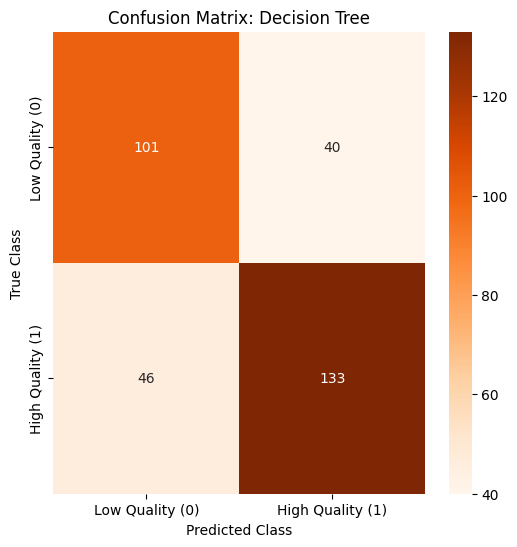

In [9]:
# Decision Tree Classifier
# Decision Trees split the data based on feature values to create a model that can classify the data.

dt_params = {'max_depth': [None, 5, 10, 20]}  # We'll tune the maximum depth of the tree.
dt_clf = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

# Visualize predictions with a confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix: Decision Tree')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks([0.5, 1.5], ['Low Quality (0)', 'High Quality (1)'])
plt.yticks([0.5, 1.5], ['Low Quality (0)', 'High Quality (1)'])
plt.show()

# Decision Trees are interpretable but can overfit without regularization.


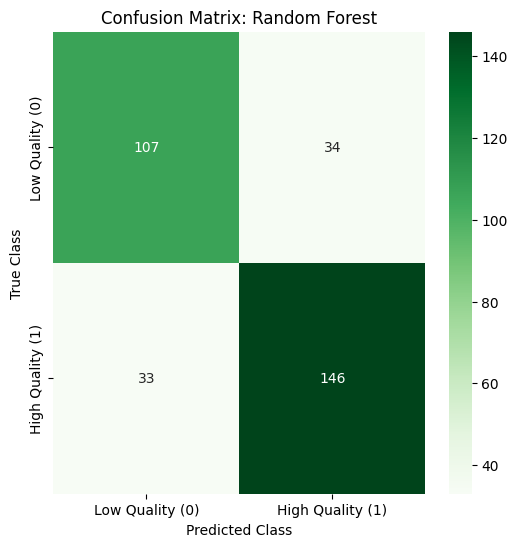

In [10]:
# Random Forest with GridSearchCV
# Random Forest is an ensemble method that combines multiple decision trees to make more accurate predictions.

rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
rf_clf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Visualize predictions with a confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks([0.5, 1.5], ['Low Quality (0)', 'High Quality (1)'])
plt.yticks([0.5, 1.5], ['Low Quality (0)', 'High Quality (1)'])
plt.show()

# Random Forest is more robust than a single decision tree and less likely to overfit.


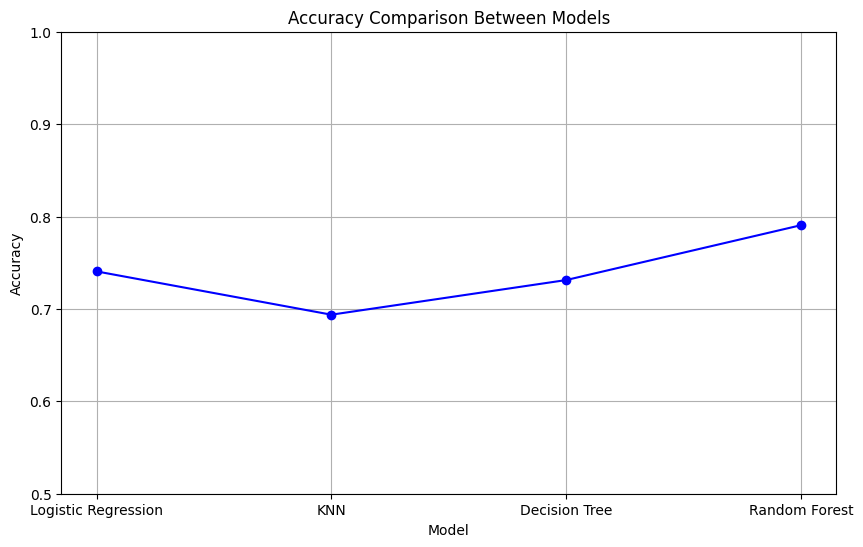

In [11]:
# Model Comparison with Different Visualizations

from sklearn.metrics import precision_score, recall_score

# List of model names for reference
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']

# Calculate accuracy, precision, and recall for each model
accuracies = [
    accuracy_score(y_test, y_pred_log_reg),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf)
]

precisions = [
    precision_score(y_test, y_pred_log_reg),
    precision_score(y_test, y_pred_knn),
    precision_score(y_test, y_pred_dt),
    precision_score(y_test, y_pred_rf)
]

recalls = [
    recall_score(y_test, y_pred_log_reg),
    recall_score(y_test, y_pred_knn),
    recall_score(y_test, y_pred_dt),
    recall_score(y_test, y_pred_rf)
]

# Scatter Plot of Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title('Accuracy Comparison Between Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.grid(True)
plt.show()

# This scatter plot shows the accuracies of each model with points connected by lines.

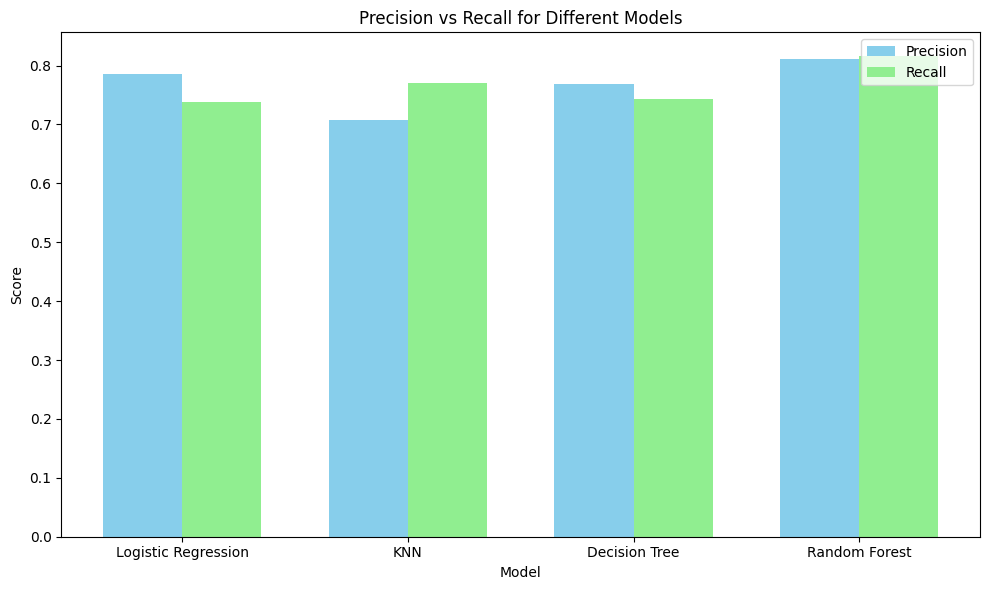

In [12]:
# Precision vs Recall Comparison (Bar Chart)
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(model_names))

# Plot precision
plt.bar(index, precisions, bar_width, label='Precision', color='skyblue')

# Plot recall next to precision
plt.bar(index + bar_width, recalls, bar_width, label='Recall', color='lightgreen')

plt.title('Precision vs Recall for Different Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(index + bar_width / 2, model_names)
plt.legend()

plt.tight_layout()
plt.show()

# This bar chart shows the comparison of precision and recall for each model side by side.